In [1]:
import pandas as pd
import numpy as np
import seaborn as sns     #Loading and Preprocessing datasets
import matplotlib.pyplot as plt
sns.set(style="whitegrid")   #libraries used
df=sns.load_dataset('titanic')
df.shape, df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


((891, 15), None)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64


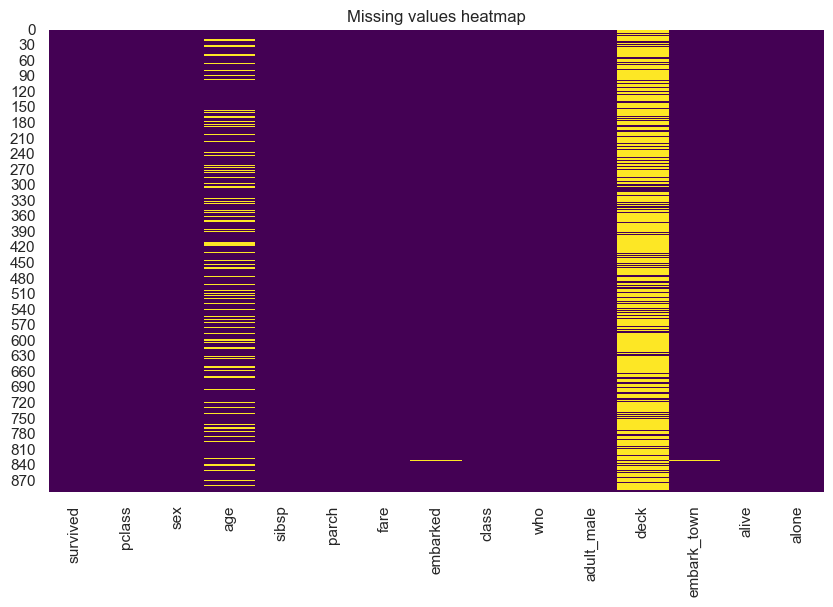

In [2]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  #Missing‑value check
plt.title("Missing values heatmap")
plt.show()


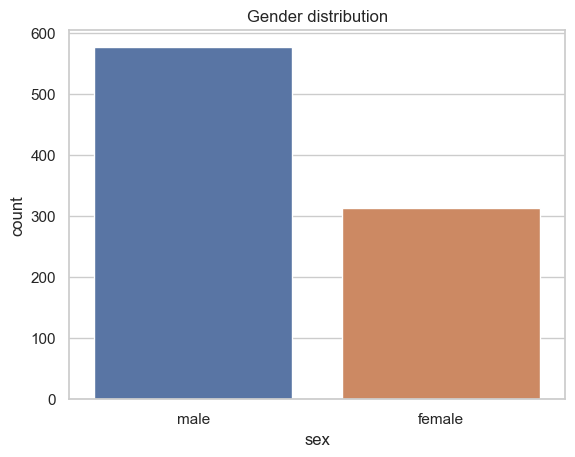

AttributeError: 'numpy.int64' object has no attribute 'startswith'

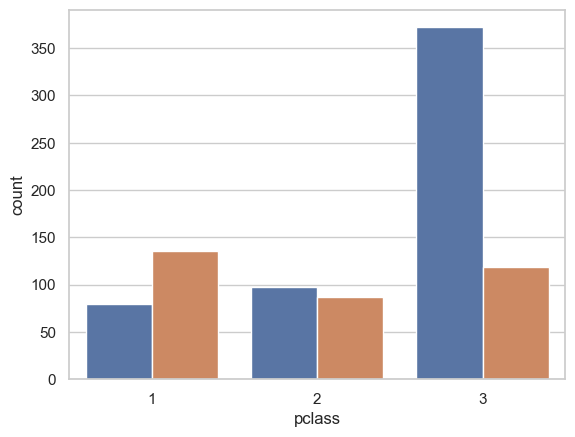

In [3]:
sns.countplot(x='sex', data=df)
plt.title('Gender distribution'); plt.show()  #Univariate distributions

sns.countplot(x='pclass', hue='survived', data=df)  # Categorical features
plt.title('Survival by passenger class'); plt.show()


C:\Users\AMBUJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


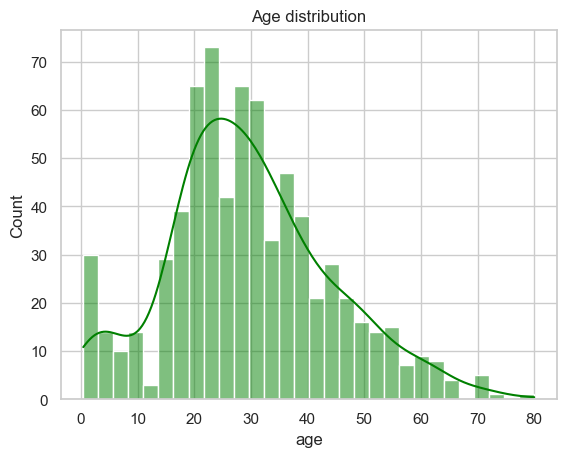

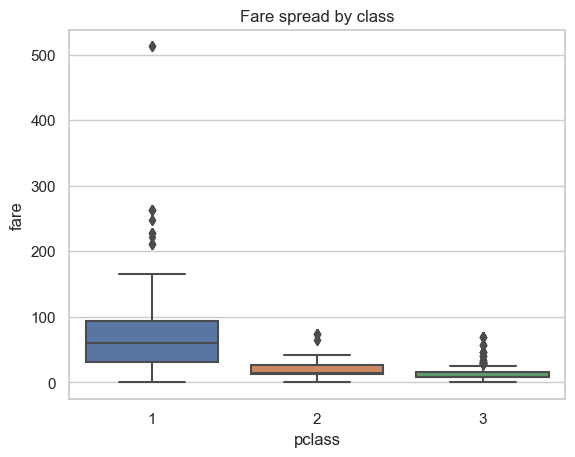

In [4]:
sns.histplot(df['age'].dropna(), bins=30, kde=True, color='green')
plt.title('Age distribution'); plt.show()
 #Numeric features
sns.boxplot(x='pclass', y='fare', data=df)  
plt.title('Fare spread by class'); plt.show()


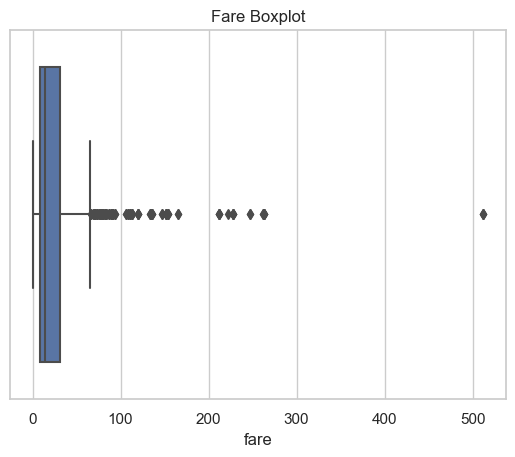

Fare outliers (>3σ): 20


In [5]:
from scipy import stats# Fare
sns.boxplot(x=df['fare'])
plt.title('Fare Boxplot')  # Outlier detection
plt.show()
z = np.abs(stats.zscore(df['fare'].dropna()))
outliers = df['fare'][z > 3]
print(f'Fare outliers (>3σ): {len(outliers)}')


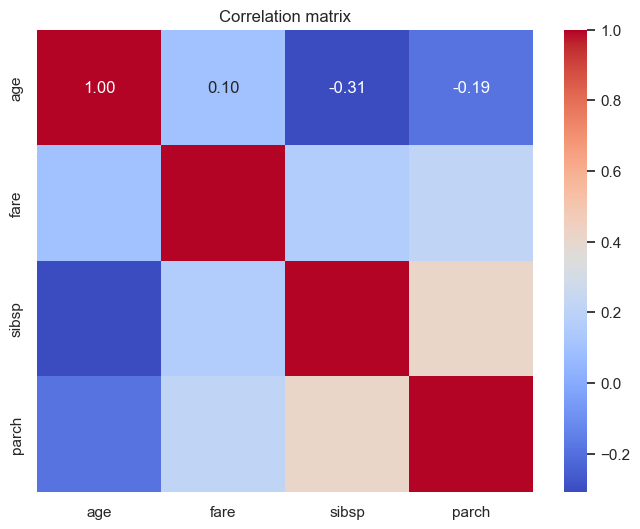

survived,0,1
pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [7]:
corr = df[['age','fare','sibsp','parch']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f #Bivariate associations & correlation
plt.title('Correlation matrix'); plt.show()
pd.crosstab(df['pclass'], df['survived'], normalize='index')


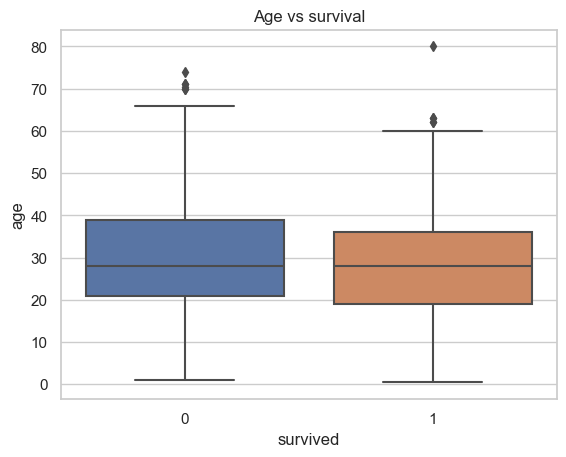

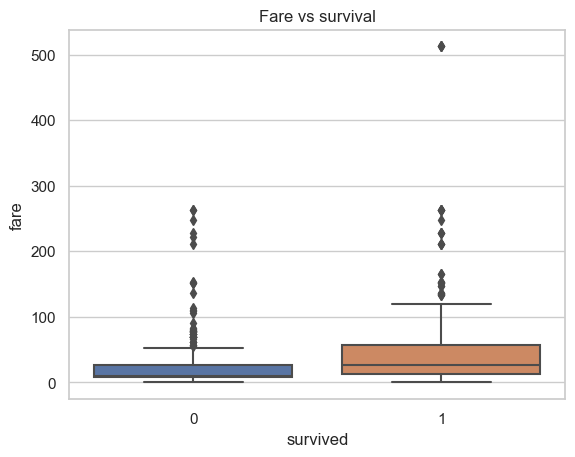

In [8]:
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs survival'); plt.show()
sns.boxplot(x='survived', y='fare', data=df) #Mixed types
plt.title('Fare vs survival'); plt.show()


C:\Users\AMBUJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AMBUJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AMBUJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


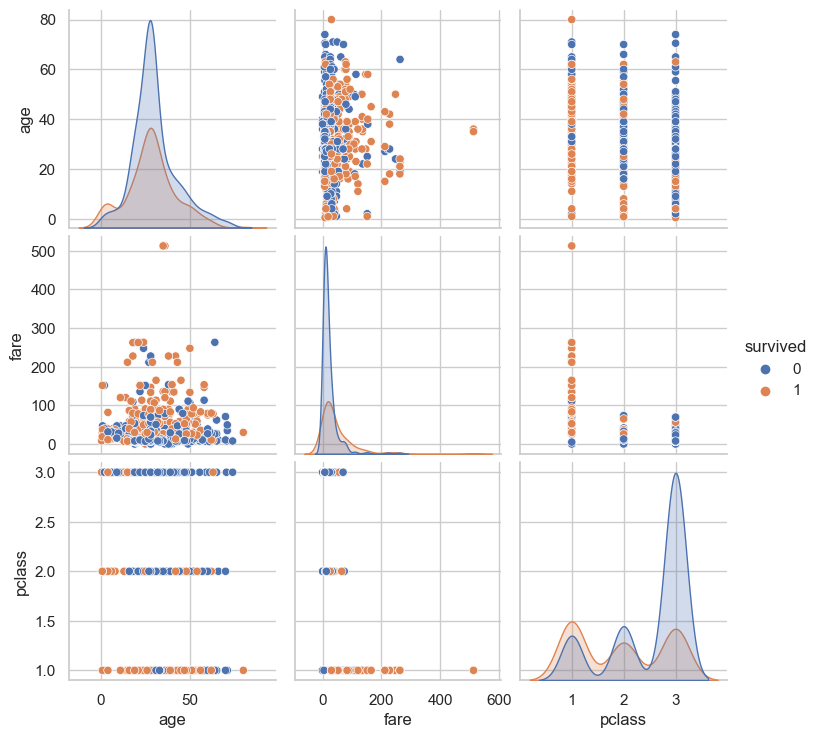

In [10]:
df['age'].fillna(df['age'].median(), inplace=True)
sns.pairplot(df[['age','fare','pclass','survived']], hue='survived') #Handling missing values

#Putting it all together
